In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trainmain=pd.read_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\train.csv")
testmain=pd.read_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\test.csv")

In [3]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
def uniquevalues(df):
    for col in df.columns:
        if df[col].dtype=='O':
            print("The unique values of {0} is {1}".format(col,df[col].nunique()))
            
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category,drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns    

def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

def dateformatchange(date):
    Month=date.split('-')[0]
    Year="20"+ date.split('-')[1]
    monthnum=d.get(Month)
    newdate= "0" + str(monthnum) + "/" + Year
    return newdate

def checkmvalue(df):
    allm=['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']
    j=0
    for i in allm:
        if df[i]>0:
            j=1
    return j  
def checknummissed(df):
    allm=['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']
    j=0
    for i in allm:
        if df[i]>0:
            j=j+1
    return j 

def checkmaxmissed(df):
    allm=['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11']
    j=df[allm].max()
    return j

In [4]:
df=trainmain.copy()
df_test=testmain.copy()

In [5]:
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 29 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [6]:
missing_values = missing_values_table(df_test)
missing_values.head(20)

Your selected dataframe has 28 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [7]:
# Generating additional features

In [8]:
df.drop('loan_id',axis=1,inplace=True)
df_test.drop('loan_id',axis=1,inplace=True)
df_test['origination_date'] =pd.to_datetime(df_test['origination_date']).dt.strftime('%Y-%d-%m')
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12 }
df_test['first_payment_date']=df_test['first_payment_date'].apply(dateformatchange)

In [9]:
import datetime

now = datetime.datetime.now()
today=now.strftime("%Y-%m-%d")
df['loan_age_months'] =  (pd.to_datetime(today)-pd.to_datetime(df.origination_date))/np.timedelta64(1,'M')
df['loan_age_months'] = df['loan_age_months'].astype(int)
df['remaining_months']=df['loan_term']-df['loan_age_months']

In [10]:
df_test['loan_age_months'] =  (pd.to_datetime(today)-pd.to_datetime(df_test.origination_date))/np.timedelta64(1,'M')
df_test['loan_age_months'] = df_test['loan_age_months'].astype(int)
df_test['remaining_months']=df_test['loan_term']-df_test['loan_age_months']

In [11]:
df['mothly_amount']=(df['unpaid_principal_bal']/df['remaining_months'])

In [12]:
df_test['mothly_amount']=(df_test['unpaid_principal_bal']/df_test['remaining_months'])

In [13]:
df['flagm']= df.apply(lambda row: checkmvalue(row), axis = 1)
df_test['flagm']= df_test.apply(lambda row: checkmvalue(row), axis = 1) 

In [14]:
df['flagmmissedno']= df.apply(lambda row: checknummissed(row), axis = 1)
df_test['flagmmissedno']= df_test.apply(lambda row: checknummissed(row), axis = 1)

In [15]:
df['flagmmaxmissed']= df.apply(lambda row: checkmaxmissed(row), axis = 1)
df_test['flagmmaxmissed']= df_test.apply(lambda row: checkmaxmissed(row), axis = 1)

In [16]:
X=df.drop('m13',axis=1)
y=df['m13']


In [52]:
# feature importance

In [61]:
import catboost as cb
cat_ind1 = [0,1,5,6,11]
cat_rg1 = cb.CatBoostClassifier(iterations=625, learning_rate=0.06, depth=8, loss_function='Logloss', random_seed=2018)

In [62]:
cat_rg1.fit(X=X, y=y, cat_features=cat_ind1, verbose=True)

0:	learn: 0.5306006	total: 148ms	remaining: 1m 32s
1:	learn: 0.4197184	total: 264ms	remaining: 1m 22s
2:	learn: 0.3234874	total: 429ms	remaining: 1m 28s
3:	learn: 0.2529969	total: 575ms	remaining: 1m 29s
4:	learn: 0.1986328	total: 726ms	remaining: 1m 30s
5:	learn: 0.1557681	total: 851ms	remaining: 1m 27s
6:	learn: 0.1233868	total: 1.01s	remaining: 1m 29s
7:	learn: 0.1005027	total: 1.12s	remaining: 1m 26s
8:	learn: 0.0819490	total: 1.26s	remaining: 1m 26s
9:	learn: 0.0695762	total: 1.42s	remaining: 1m 27s
10:	learn: 0.0592984	total: 1.58s	remaining: 1m 27s
11:	learn: 0.0511881	total: 1.72s	remaining: 1m 27s
12:	learn: 0.0451431	total: 1.9s	remaining: 1m 29s
13:	learn: 0.0402427	total: 2.03s	remaining: 1m 28s
14:	learn: 0.0363597	total: 2.21s	remaining: 1m 29s
15:	learn: 0.0330023	total: 2.35s	remaining: 1m 29s
16:	learn: 0.0303369	total: 2.51s	remaining: 1m 29s
17:	learn: 0.0282557	total: 2.65s	remaining: 1m 29s
18:	learn: 0.0266737	total: 2.82s	remaining: 1m 30s
19:	learn: 0.0253163	to

158:	learn: 0.0148277	total: 24.6s	remaining: 1m 12s
159:	learn: 0.0148187	total: 24.8s	remaining: 1m 12s
160:	learn: 0.0148115	total: 25s	remaining: 1m 11s
161:	learn: 0.0148020	total: 25.2s	remaining: 1m 11s
162:	learn: 0.0147987	total: 25.3s	remaining: 1m 11s
163:	learn: 0.0147832	total: 25.5s	remaining: 1m 11s
164:	learn: 0.0147576	total: 25.7s	remaining: 1m 11s
165:	learn: 0.0147396	total: 25.8s	remaining: 1m 11s
166:	learn: 0.0147310	total: 26s	remaining: 1m 11s
167:	learn: 0.0147223	total: 26.2s	remaining: 1m 11s
168:	learn: 0.0147148	total: 26.4s	remaining: 1m 11s
169:	learn: 0.0146787	total: 26.5s	remaining: 1m 10s
170:	learn: 0.0146763	total: 26.7s	remaining: 1m 10s
171:	learn: 0.0146672	total: 26.8s	remaining: 1m 10s
172:	learn: 0.0146612	total: 27s	remaining: 1m 10s
173:	learn: 0.0146501	total: 27.2s	remaining: 1m 10s
174:	learn: 0.0146492	total: 27.3s	remaining: 1m 10s
175:	learn: 0.0146283	total: 27.4s	remaining: 1m 10s
176:	learn: 0.0146151	total: 27.6s	remaining: 1m 9s


317:	learn: 0.0129668	total: 51.8s	remaining: 50s
318:	learn: 0.0129480	total: 51.9s	remaining: 49.8s
319:	learn: 0.0129336	total: 52.1s	remaining: 49.7s
320:	learn: 0.0129273	total: 52.3s	remaining: 49.5s
321:	learn: 0.0129132	total: 52.5s	remaining: 49.4s
322:	learn: 0.0129025	total: 52.6s	remaining: 49.2s
323:	learn: 0.0128954	total: 52.8s	remaining: 49s
324:	learn: 0.0128857	total: 53s	remaining: 48.9s
325:	learn: 0.0128741	total: 53.1s	remaining: 48.7s
326:	learn: 0.0128666	total: 53.3s	remaining: 48.6s
327:	learn: 0.0128460	total: 53.5s	remaining: 48.4s
328:	learn: 0.0128414	total: 53.6s	remaining: 48.3s
329:	learn: 0.0128185	total: 53.8s	remaining: 48.1s
330:	learn: 0.0128010	total: 54s	remaining: 48s
331:	learn: 0.0127869	total: 54.2s	remaining: 47.8s
332:	learn: 0.0127783	total: 54.3s	remaining: 47.7s
333:	learn: 0.0127597	total: 54.5s	remaining: 47.5s
334:	learn: 0.0127500	total: 54.7s	remaining: 47.3s
335:	learn: 0.0127385	total: 54.9s	remaining: 47.2s
336:	learn: 0.0127260	

475:	learn: 0.0113084	total: 1m 18s	remaining: 24.7s
476:	learn: 0.0112980	total: 1m 19s	remaining: 24.5s
477:	learn: 0.0112872	total: 1m 19s	remaining: 24.4s
478:	learn: 0.0112784	total: 1m 19s	remaining: 24.2s
479:	learn: 0.0112686	total: 1m 19s	remaining: 24s
480:	learn: 0.0112635	total: 1m 19s	remaining: 23.9s
481:	learn: 0.0112563	total: 1m 19s	remaining: 23.7s
482:	learn: 0.0112488	total: 1m 20s	remaining: 23.5s
483:	learn: 0.0112359	total: 1m 20s	remaining: 23.4s
484:	learn: 0.0112291	total: 1m 20s	remaining: 23.2s
485:	learn: 0.0112189	total: 1m 20s	remaining: 23s
486:	learn: 0.0112114	total: 1m 20s	remaining: 22.9s
487:	learn: 0.0111985	total: 1m 20s	remaining: 22.7s
488:	learn: 0.0111912	total: 1m 21s	remaining: 22.5s
489:	learn: 0.0111801	total: 1m 21s	remaining: 22.4s
490:	learn: 0.0111670	total: 1m 21s	remaining: 22.2s
491:	learn: 0.0111548	total: 1m 21s	remaining: 22s
492:	learn: 0.0111506	total: 1m 21s	remaining: 21.9s
493:	learn: 0.0111413	total: 1m 21s	remaining: 21.7s

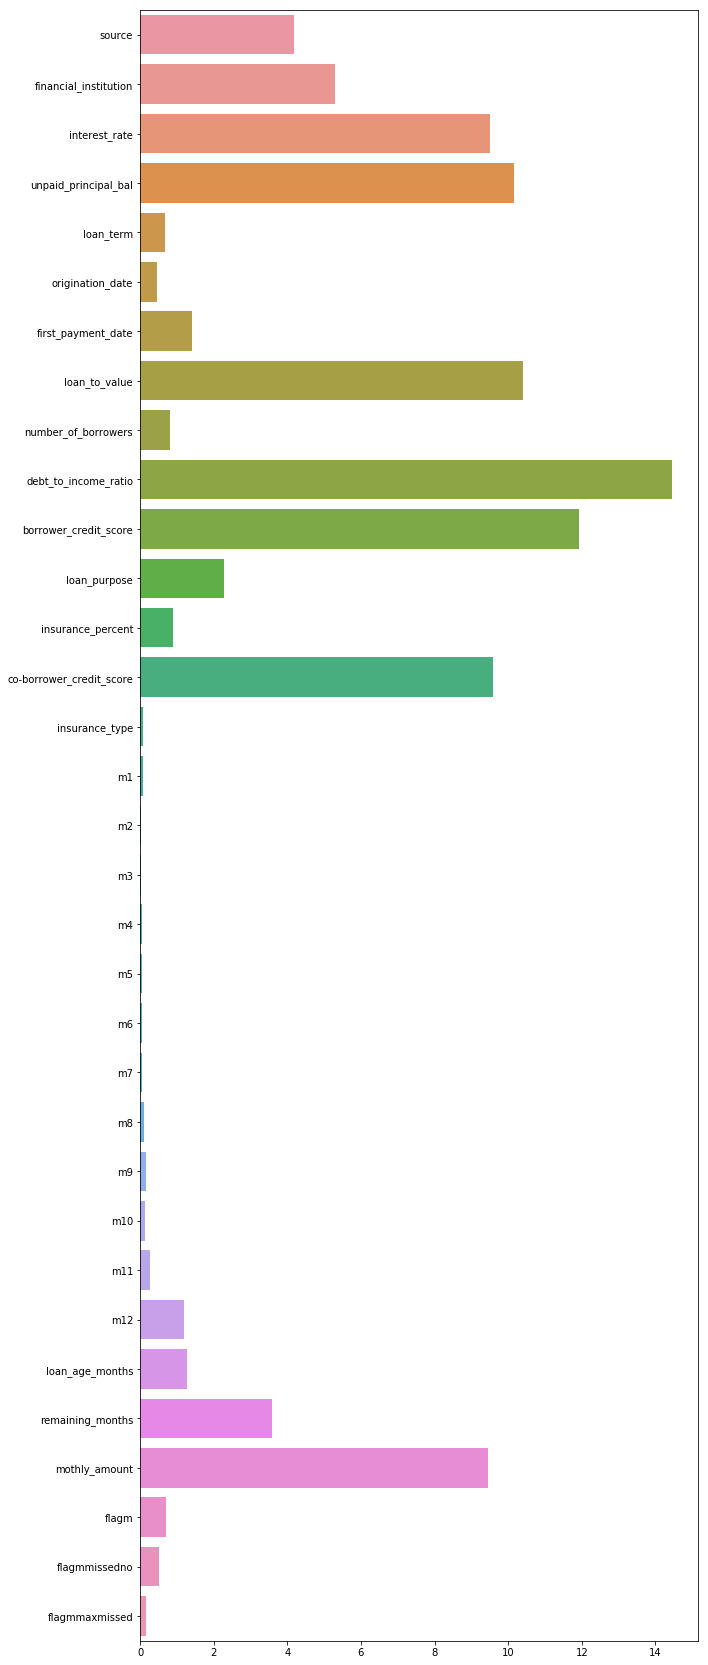

In [63]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.barplot(cat_rg1.feature_importances_, X.columns, ax=ax)
plt.show()

In [64]:
fea_imp_ = pd.DataFrame({'cols':X.columns, 'fea_imp':cat_rg1.feature_importances_})
fea_imp_ =fea_imp_.sort_values(by=['fea_imp'], ascending = False).reset_index(drop=True)

In [65]:
# selecting first 20 important columns
fea_imp_

cols    fea_imp
0       debt_to_income_ratio  14.437829
1      borrower_credit_score  11.936580
2              loan_to_value  10.391145
3       unpaid_principal_bal  10.169726
4   co-borrower_credit_score   9.584420
5              interest_rate   9.498708
6              mothly_amount   9.454364
7      financial_institution   5.295761
8                     source   4.181075
9           remaining_months   3.581361
10              loan_purpose   2.279753
11        first_payment_date   1.408385
12           loan_age_months   1.285989
13                       m12   1.183888
14         insurance_percent   0.894635
15       number_of_borrowers   0.816127
16                     flagm   0.717604
17                 loan_term   0.677491
18             flagmmissedno   0.521727
19          origination_date   0.460223
20                       m11   0.256464
21                        m9   0.165645
22            flagmmaxmissed   0.159026
23                       m10   0.130855
24                        m8   0.103736
25                        m1   0.069181
26            insurance_type   0.068478
27                        m5   0.061967
28                        m7   0.057745
29                        m4   0.054668
30                        m6   0.050808
31                        m2   0.022476
32                        m3   0.022159

In [66]:
X=X.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','insurance_type','flagmmaxmissed','flagmmissedno','flagm'],axis=1)
df_test=df_test.drop(['m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','insurance_type','flagmmaxmissed','flagmmissedno','flagm'],axis=1)

In [17]:
X, cat_cols = one_hot_encoder(X, False)
df, cat_cols = one_hot_encoder(df, False)
df_test, cat_cols = one_hot_encoder(df_test, False)

In [21]:
from sklearn.metrics import f1_score

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [22]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

reduc_estimator =LGBMClassifier(
    max_depth= -1,
    boosting_type= 'gbdt',
    objective= 'binary', 
    nthread= 5, 
    num_leaves= 27,
    learning_rate= 0.0085, 
    max_bin= 512, 
    subsample_for_bin= 200,
    subsample= 0.7, 
    subsample_freq= 1, 
    colsample_bytree= 0.65, 
    reg_alpha= 1.2, 
    reg_lambda= 1.2, 
    min_split_gain= 0.5, 
    min_child_weight= 1,
    min_child_samples= 5, 
    scale_pos_weight= 1,
    num_class= 1, 
    metric= 'f1',
    n_estimators= 100)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [x for x in range(36, 46, 2)],
    'learning_rate': [0.0085,0.085,0.01]
    
}

gridsearch = GridSearchCV(reduc_estimator, param_grid,cv=5)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 2000)
print('Best parameters found by grid search are:', gridsearch.best_params_)

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: fit() got an unexpected keyword argument 'feval'

In [75]:
gridsearch.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.65,
        importance_type='split', learning_rate=0.085, max_bin=512,
        max_depth=-1, metric='binary_error', min_child_samples=5,
        min_child_weight=1, min_split_gain=0.5, n_estimators=36, n_jobs=-1,
        nthread=5, num_class=1, num_leaves=27, objective='binary',
        random_state=None, reg_alpha=1.2, reg_lambda=1.2,
        scale_pos_weight=1, silent=True, subsample=0.7,
        subsample_for_bin=200, subsample_freq=1)

In [76]:
pred=gridsearch.best_estimator_.predict(df_test)

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [77]:
pred[pred==1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [78]:
sub=pd.DataFrame(columns=['loan_id','m13'])
sub['loan_id']=testmain['loan_id']
sub['m13']=pred
sub.to_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\sub.csv",index=False)

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std = sc.fit_transform(X)
df_test_std=sc.fit_transform(df_test)

In [80]:
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.callbacks import EarlyStopping

C:\Users\kaushik\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [81]:
X_std.shape

(116058, 40)

In [82]:
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=40, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(rate = 0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    # create your model using this function

def train_and_evaluate__model(model, data_train, labels_train, data_test, labels_test):
    model.fit(data_train,labels_train, epochs=100, batch_size=60, verbose=1)
    scores = model.evaluate(data_test, labels_test, verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
   




In [83]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=9999)
cvscores = []
for i, (train, test) in enumerate(kfold.split(X_std, y)):
    print("Running Fold", i+1)
    model = None # Clearing the NN.
    model = create_model()
    train_and_evaluate__model(model, X_std[train], y[train], X_std[test], y[test])
    

Running Fold 1
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
92845/92845 [==============================] - 2s 19us/step - loss: 0.0704 - acc: 0.9931
Epoch 2/100
92845/92845 [==============================] - 2s 18us/step - loss: 0.0251 - acc: 0.9945
Epoch 3/100
92845/92845 [==============================] - 1s 16us/step - loss: 0.0252 - acc: 0.9945
Epoch 4/100
92845/92845 [==============================] - 1s 16us/step - loss: 0.0246 - acc: 0.9945
Epoch 5/100
92845/92845 [==============================] - 1s 16us/step - loss: 0.0238 - acc: 0.9945
Epoch 6/100
92845/92845 [==============================] - 1s 16us/step - loss: 0.0240 - acc: 0.9945
Epoch 7/100
92845/92845 [==============================] - 1s 16us/step - loss: 0.0237 - acc: 0.9945
Epoch 8/100
92845/92845 [==================

92846/92846 [==============================] - 2s 20us/step - loss: 0.0223 - acc: 0.9945
Epoch 51/100
92846/92846 [==============================] - 2s 20us/step - loss: 0.0221 - acc: 0.9945
Epoch 52/100
92846/92846 [==============================] - 2s 20us/step - loss: 0.0219 - acc: 0.9945
Epoch 53/100
92846/92846 [==============================] - 2s 20us/step - loss: 0.0222 - acc: 0.9945
Epoch 54/100
92846/92846 [==============================] - 2s 20us/step - loss: 0.0220 - acc: 0.9945
Epoch 55/100
92846/92846 [==============================] - 2s 22us/step - loss: 0.0219 - acc: 0.9945
Epoch 56/100
92846/92846 [==============================] - 2s 20us/step - loss: 0.0220 - acc: 0.9945
Epoch 57/100
92846/92846 [==============================] - 2s 20us/step - loss: 0.0221 - acc: 0.9945
Epoch 58/100
92846/92846 [==============================] - 2s 21us/step - loss: 0.0222 - acc: 0.9945
Epoch 59/100
92846/92846 [==============================] - 2s 22us/step - loss: 0.0218 - acc: 

92847/92847 [==============================] - 2s 20us/step - loss: 0.0240 - acc: 0.9945
Epoch 9/100
92847/92847 [==============================] - 2s 22us/step - loss: 0.0238 - acc: 0.9945
Epoch 10/100
92847/92847 [==============================] - 2s 21us/step - loss: 0.0236 - acc: 0.9945
Epoch 11/100
92847/92847 [==============================] - 2s 21us/step - loss: 0.0235 - acc: 0.9945
Epoch 12/100
92847/92847 [==============================] - 2s 22us/step - loss: 0.0236 - acc: 0.9945
Epoch 13/100
92847/92847 [==============================] - 2s 22us/step - loss: 0.0231 - acc: 0.9945
Epoch 14/100
92847/92847 [==============================] - 2s 22us/step - loss: 0.0232 - acc: 0.9945
Epoch 15/100
92847/92847 [==============================] - 2s 21us/step - loss: 0.0234 - acc: 0.9945
Epoch 16/100
92847/92847 [==============================] - 2s 20us/step - loss: 0.0231 - acc: 0.9945
Epoch 17/100
92847/92847 [==============================] - 2s 22us/step - loss: 0.0234 - acc: 0

92847/92847 [==============================] - 2s 21us/step - loss: 0.0206 - acc: 0.9960
Epoch 68/100
92847/92847 [==============================] - 2s 20us/step - loss: 0.0205 - acc: 0.9961
Epoch 69/100
92847/92847 [==============================] - 2s 20us/step - loss: 0.0206 - acc: 0.9959
Epoch 70/100
92847/92847 [==============================] - 2s 22us/step - loss: 0.0204 - acc: 0.9962
Epoch 71/100
92847/92847 [==============================] - 2s 21us/step - loss: 0.0208 - acc: 0.9958
Epoch 72/100
92847/92847 [==============================] - 2s 21us/step - loss: 0.0203 - acc: 0.9961
Epoch 73/100
92847/92847 [==============================] - 2s 21us/step - loss: 0.0207 - acc: 0.9960
Epoch 74/100
92847/92847 [==============================] - 2s 21us/step - loss: 0.0206 - acc: 0.9960
Epoch 75/100
92847/92847 [==============================] - 2s 22us/step - loss: 0.0202 - acc: 0.9961
Epoch 76/100
92847/92847 [==============================] - 2s 21us/step - loss: 0.0202 - acc: 

In [84]:
predictions=model.predict(df_test_std)

In [85]:
predictions[predictions==1]

array([], dtype=float32)

In [239]:
predictions[predictions>1]

array([], dtype=float32)

In [91]:
pred=np.where(predictions > 0.05, 1, 0)

In [93]:
pred[pred==1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

C:\Users\kaushik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


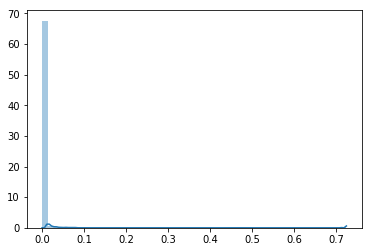

In [229]:
sns.distplot(predictions)

In [221]:
pred[pred==1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [94]:
sub=pd.DataFrame(columns=['loan_id','m13'])
sub['loan_id']=testmain['loan_id']
sub['m13']=pred
sub.to_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\sub.csv",index=False)

In [318]:
X['debt_to_income_ratio'].max()

64.0